# ABSTRACT

UNSUPERVISED LEARNING ALGORITHMS APPLIED TO ANOMALY DETECTION IN OIL AND GAS WELLS

Monitoring through sensors is a powerful tool in the evaluation of vibrations, loads, deformations, among other problems in which gathering data allows to detect undesirable events that may arise in structures. Growing opportunities have been observed in companies offering sensing, monitoring, and digital transformation services, which offer cost reduction, increased operational safety and improved performance. Technologies for processing the data collected by sensors using machine learning (ML) methodologies have proven to be efficient tools in engineering processes. In the context of petroleum engineering, the prediction and detection of unexpected events stands out, by supporting decision-making processes and adding value to products and services. Thus, this paper aims to study and develop ML-based models for detecting anomalous states in oil wells, by applying classical techniques such as Support Vector Machines, Isolation Forest and Deep Neural Network. It is expected to compare the efficiency of these methodologies applied to time series datasets of pressure, temperature and flow rate, allowing to predict the anomaly occurrence and generate alerts to the production operator. It is observed the practical application and potential of the proposed methodologies for the intended product, being able to improve the fault detection process in oil wells, as well as ensure their integrity.

Machine learning; Autoencoder; LSTM

# Etapas
1. Ler o Artigos do Vargas
2. Selecionar tipo de anomalia a ser analisada
3. Tratar os dados para usar nos moodelos
4. Selecionar Modelos
    - SVM One Class
    - Isolation Forest
    - LSTM
    - Autoencoders
5. Testar Modelos
6. Analisar Métricas

# 1. Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 2. Dataset

In [2]:
dataFile = '6/WELL-00004_20171031193025.csv'
df = pd.read_csv(dataFile, index_col='timestamp', parse_dates=['timestamp'])
df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
timestamp,,,,,,,,,
2017-10-31 19:30:25,0.0,13359720.0,106.8783,5757488.0,72.78588,NaN,NaN,NaN,0.0
2017-10-31 19:30:26,0.0,13360870.0,106.8603,5757488.0,72.78550,NaN,NaN,NaN,0.0
2017-10-31 19:30:27,0.0,13362020.0,106.8423,5757488.0,72.78513,NaN,NaN,NaN,0.0
2017-10-31 19:30:28,0.0,13364320.0,106.8513,5757488.0,72.78474,NaN,NaN,NaN,0.0
2017-10-31 19:30:29,0.0,13366620.0,106.8603,5757488.0,72.78437,NaN,NaN,NaN,0.0


# 3. EDA - Exploratory Data Analysis

In [3]:
df.describe()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
count,1079.0,1.079000e+03,1079.000000,1.079000e+03,1079.000000,0.0,0.0,0.0,1059.000000
mean,0.0,1.341278e+07,106.841783,5.885876e+06,72.582101,NaN,NaN,NaN,51.435316
std,0.0,3.641133e+04,0.028772,1.329051e+05,0.117816,NaN,NaN,NaN,52.253005
min,0.0,1.335743e+07,106.747800,5.734155e+06,72.378320,NaN,NaN,NaN,0.000000
25%,0.0,1.338386e+07,106.837800,5.741654e+06,72.480210,NaN,NaN,NaN,0.000000
50%,0.0,1.338960e+07,106.846800,5.922261e+06,72.582100,NaN,NaN,NaN,6.000000
75%,0.0,1.345453e+07,106.855800,6.016541e+06,72.683990,NaN,NaN,NaN,106.000000
max,0.0,1.347464e+07,106.900800,6.055821e+06,72.785880,NaN,NaN,NaN,106.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1079 entries, 2017-10-31 19:30:25 to 2017-10-31 19:48:23
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   P-PDG       1079 non-null   float64
 1   P-TPT       1079 non-null   float64
 2   T-TPT       1079 non-null   float64
 3   P-MON-CKP   1079 non-null   float64
 4   T-JUS-CKP   1079 non-null   float64
 5   P-JUS-CKGL  0 non-null      float64
 6   T-JUS-CKGL  0 non-null      float64
 7   QGL         0 non-null      float64
 8   class       1059 non-null   float64
dtypes: float64(9)
memory usage: 84.3 KB


In [5]:
df.isnull().sum()

P-PDG            0
P-TPT            0
T-TPT            0
P-MON-CKP        0
T-JUS-CKP        0
P-JUS-CKGL    1079
T-JUS-CKGL    1079
QGL           1079
class           20
dtype: int64

In [22]:
# Dropando algumas colunas tomando como base a quantidade de NaN e sabendo como um poço funciona

cols_to_drop = ['P-PDG', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL']
df_dropped = df.drop(columns=cols_to_drop)
df_dropped.head()

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
timestamp,,,,,
2017-10-31 19:30:25,13359720.0,106.8783,5757488.0,72.78588,0.0
2017-10-31 19:30:26,13360870.0,106.8603,5757488.0,72.78550,0.0
2017-10-31 19:30:27,13362020.0,106.8423,5757488.0,72.78513,0.0
2017-10-31 19:30:28,13364320.0,106.8513,5757488.0,72.78474,0.0
2017-10-31 19:30:29,13366620.0,106.8603,5757488.0,72.78437,0.0


# 4. Visualização

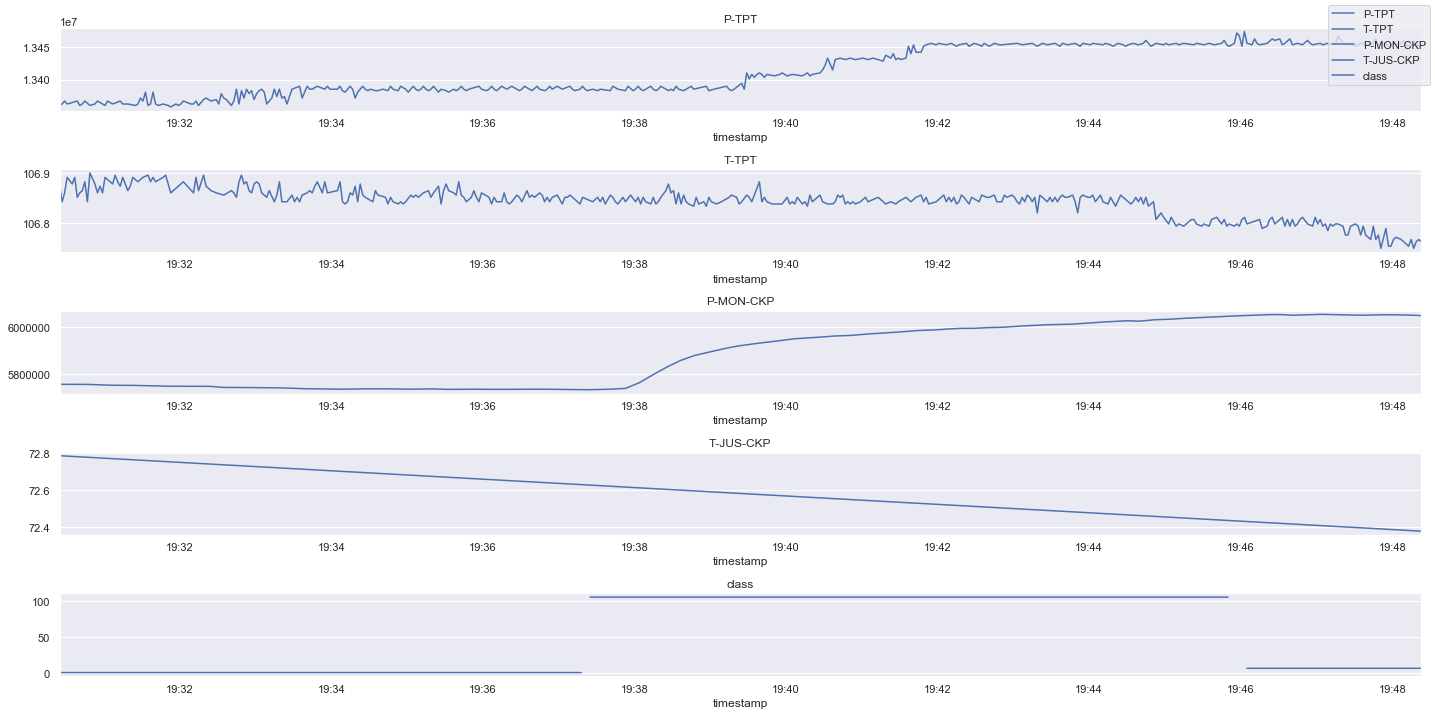

In [23]:
n = df_dropped.shape[1]
fig, ax = plt.subplots(n, 1, figsize=(20,10))
row_number = 0
for name in df_dropped.columns:
    df_dropped[name].plot(ax=ax[row_number], label=name, title=name)
    row_number += 1

fig.legend()
fig.tight_layout()

# 5 - Salvando o dataset de trabalho

In [24]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1079 entries, 2017-10-31 19:30:25 to 2017-10-31 19:48:23
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   P-TPT      1079 non-null   float64
 1   T-TPT      1079 non-null   float64
 2   P-MON-CKP  1079 non-null   float64
 3   T-JUS-CKP  1079 non-null   float64
 4   class      1059 non-null   float64
dtypes: float64(5)
memory usage: 50.6 KB


In [26]:
df_dropped.isnull().sum()

P-TPT         0
T-TPT         0
P-MON-CKP     0
T-JUS-CKP     0
class        20
dtype: int64

In [30]:
np.where(df_dropped['class'].isnull())[0]

array([414, 415, 416, 417, 418, 419, 926, 927, 928, 929, 930, 931, 932,
       933, 934, 935, 936, 937, 938, 939], dtype=int64)

In [42]:
df_dropped['class'].unique()

array([  0.,  nan, 106.,   6.])

In [49]:
df_to_csv = df_dropped.copy()
df_to_csv['class'].replace([0, 106, 6], [0, 1, 2], inplace=True)
df_to_csv['class'].fillna(3, inplace=True)
df_to_csv['class'].unique()

array([0., 3., 1., 2.])

In [50]:
df_to_csv

,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,class
timestamp,,,,,
2017-10-31 19:30:25,13359720.0,106.8783,5757488.0,72.78588,0.0
2017-10-31 19:30:26,13360870.0,106.8603,5757488.0,72.78550,0.0
2017-10-31 19:30:27,13362020.0,106.8423,5757488.0,72.78513,0.0
2017-10-31 19:30:28,13364320.0,106.8513,5757488.0,72.78474,0.0
2017-10-31 19:30:29,13366620.0,106.8603,5757488.0,72.78437,0.0
...,...,...,...,...,...
2017-10-31 19:48:19,13453950.0,106.7613,6051048.0,72.37983,2.0
2017-10-31 19:48:20,13452800.0,106.7636,6050821.0,72.37946,2.0
2017-10-31 19:48:21,13451650.0,106.7658,6050746.0,72.37907,2.0


In [51]:
df_to_csv.to_csv('data_organized.csv')